---
# **Task 2: Shallow Learning Approaches**

**Objectives:**
- Train at least three classical models: Random Forest, XGBoost, Gradient Boosting
- Use Ensemble Learner (Voting/Stacking)
- Tune hyperparameters through cross-validation
- Use stratification for splits
- Evaluate using accuracy, confusion matrix, F1

In [1]:
# Imports
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier
)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Preprocessed Data
X_train = np.load("../data/X_train_processed.npy")
X_test = np.load("../data/X_test_processed.npy")
y_train = np.load("../data/y_train.npy")
y_test = np.load("../data/y_test.npy")

print("Loaded preprocessed data shapes:")
print("-" * 30)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

Loaded preprocessed data shapes:
------------------------------
X_train shape: (5625, 45)
X_test shape:  (1407, 45)
y_train shape: (5625,)
y_test shape:  (1407,)


In [3]:
# Evaluating Helper Function
def evaluate_model(name, y_true, y_pred):
    return {
        "model": name,
        "accuracy": accuracy_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "confusion_matrix": confusion_matrix(y_true, y_pred)
    }

Logistic Regression Performance:
------------------------------
Accuracy: 0.7257
F1-score: 0.6069
Confusion Matrix:
[[723 310]
 [ 76 298]]


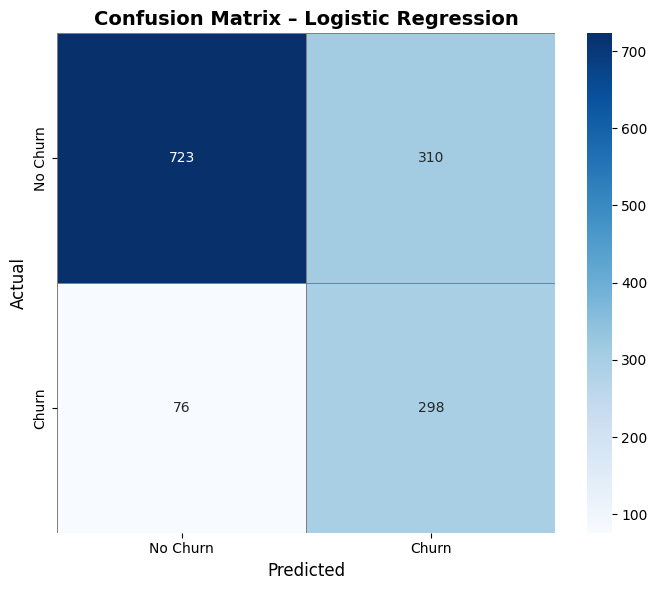

In [4]:
# Baseline: Logistic Regression
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

results = []
results.append(
    evaluate_model("Logistic Regression", y_test, y_pred_lr)
)

print("Logistic Regression Performance:")
print("-" * 30)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")

cm = confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=True,
    linewidths=0.5,
    linecolor="gray",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)

plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix – Logistic Regression", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [5]:
# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_results = evaluate_model("Random Forest", y_test, y_pred_rf)
results.append(rf_results)

print("Random Forest Performance:")
print("-" * 30)
print(f"Accuracy: {rf_results['accuracy']:.4f}")
print(f"F1-score: {rf_results['f1']:.4f}")
print("Confusion Matrix:")
print(rf_results["confusion_matrix"])

Random Forest Performance:
------------------------------
Accuracy: 0.7655
F1-score: 0.6163
Confusion Matrix:
[[812 221]
 [109 265]]


In [6]:
# Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

gb_results = evaluate_model("Gradient Boosting (untuned)", y_test, y_pred_gb)
results.append(gb_results)

print("Gradient Boosting (Untuned) Performance:")
print("-" * 40)
print(f"Accuracy: {gb_results['accuracy']:.4f}")
print(f"F1-score: {gb_results['f1']:.4f}")
print("Confusion Matrix:")
print(gb_results["confusion_matrix"])


Gradient Boosting (Untuned) Performance:
----------------------------------------
Accuracy: 0.7918
F1-score: 0.5710
Confusion Matrix:
[[919 114]
 [179 195]]


Tuned Gradient Boosting Performance:
------------------------------
Best hyperparameters found:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

Accuracy: 0.7925
F1-score: 0.5668
Confusion Matrix:
[[924 109]
 [183 191]]


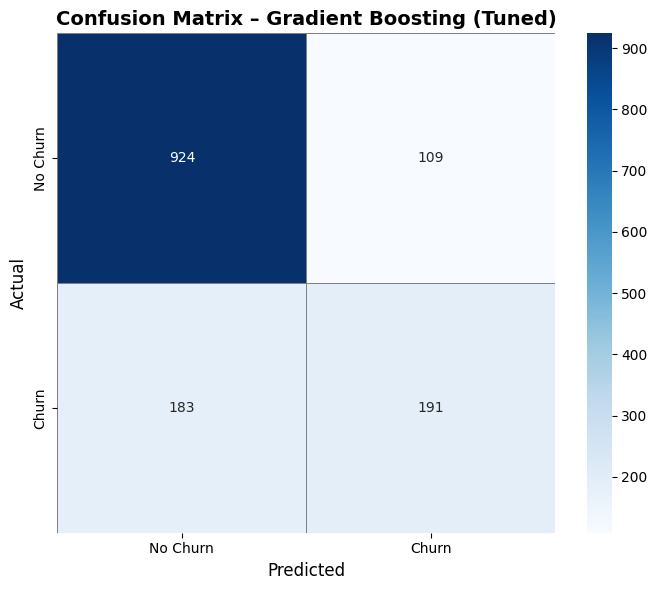

In [7]:
# Hyperparameter Tuning (Gradient Boosting)
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}

grid_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_

# Evaluate tuned model
y_pred_best_gb = best_gb.predict(X_test)
best_gb_results = evaluate_model("Gradient Boosting (tuned)", y_test, y_pred_best_gb)
results.append(best_gb_results)

# Print results
print("Tuned Gradient Boosting Performance:")
print("-" * 30)
print("Best hyperparameters found:")
print(grid_gb.best_params_)
print(f"\nAccuracy: {best_gb_results['accuracy']:.4f}")
print(f"F1-score: {best_gb_results['f1']:.4f}")
print("Confusion Matrix:")
print(best_gb_results["confusion_matrix"])

# Plot confusion matrix
cm = best_gb_results["confusion_matrix"]

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=True,
    linewidths=0.5,
    linecolor="gray",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)

plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix – Gradient Boosting (Tuned)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [8]:
# Ensemble Model (Soft Voting)
ensemble = VotingClassifier(
    estimators=[
        ("rf", rf),
        ("gb", best_gb)
    ],
    voting="soft"
)

ensemble.fit(X_train, y_train)

y_pred_ens = ensemble.predict(X_test)

ens_results = evaluate_model("Ensemble (RF + GB)", y_test, y_pred_ens)
results.append(ens_results)

print("Ensemble Model (RF + Gradient Boosting) Performance:")
print("-" * 40)
print(f"Accuracy: {ens_results['accuracy']:.4f}")
print(f"F1-score: {ens_results['f1']:.4f}")
print("Confusion Matrix:")
print(ens_results["confusion_matrix"])

Ensemble Model (RF + Gradient Boosting) Performance:
----------------------------------------
Accuracy: 0.7889
F1-score: 0.6138
Confusion Matrix:
[[874 159]
 [138 236]]


In [9]:
# Results Summary Table
results_df = pd.DataFrame(results)

print("Model Performance Summary:")
print("-" * 40)
display(results_df[["model", "accuracy", "f1"]])

Model Performance Summary:
----------------------------------------


,model,accuracy,f1
0,Logistic Regression,0.725657,0.606925
1,Random Forest,0.765458,0.616279
2,Gradient Boosting (untuned),0.791756,0.571010
3,Gradient Boosting (tuned),0.792466,0.566766
4,Ensemble (RF + GB),0.788913,0.613784


In [10]:
# Confusion Matrices Summary
print("Confusion Matrices by Model")
print("=" * 30)

for r in results:
    print(f"\nModel: {r['model']}")
    print("-" * 30)
    print(r["confusion_matrix"])


Confusion Matrices by Model

Model: Logistic Regression
------------------------------
[[723 310]
 [ 76 298]]

Model: Random Forest
------------------------------
[[812 221]
 [109 265]]

Model: Gradient Boosting (untuned)
------------------------------
[[919 114]
 [179 195]]

Model: Gradient Boosting (tuned)
------------------------------
[[924 109]
 [183 191]]

Model: Ensemble (RF + GB)
------------------------------
[[874 159]
 [138 236]]


In [11]:
# Saving Best Model (for SHAP)
import joblib

joblib.dump(best_gb, "../data/best_gb_model.pkl")

print("Best Gradient Boosting model saved successfully for SHAP analysis.")

Best Gradient Boosting model saved successfully for SHAP analysis.


### Shallow Model Summary

- Logistic Regression provides a strong linear baseline but underperforms tree-based models.
- Random Forest captures non-linear interactions and improves F1-score.
- Gradient Boosting achieves the best performance after hyperparameter tuning.
- The ensemble model provides marginal improvements but does not significantly outperform the best individual model.
- F1-score is used as the primary metric due to class imbalance.